## Process the geographic dataset and create a shape to further analysis 

In [15]:
#Load the required libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import geoplot
%matplotlib inline

## Define functions

In [110]:
def choropleth(geo_df,col):
    """
    Imprime mapa a partir de GeoDataFrame geo_df, mostrando la columna especificada
    """
    return geoplot.choropleth(geo_df,hue=geo_df[col],figsize=(10,10))

### Load the dataset

In [16]:
geographic = pd.read_csv('geographic.csv')
geographic.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


### Rearrange the data structure into a dictionary whose index corresponds to the nta_cod

In [17]:
#Create a dictionary as large as the amount of NTA Zones
res_dic = {}
for c in geographic.columns:
    res_dic[c] = []
    
#Loop used for filling the dictionary with the tuple (longitude,latitud)
for i in np.arange(0,len(geographic),2):
    for c in geographic.columns:
        if not(np.isnan(geographic.iloc[i].loc[c]) or np.isnan(geographic.iloc[i+1].loc[c])):
            res_dic[c] = res_dic[c] + [(geographic.iloc[i].loc[c],geographic.iloc[i+1].loc[c])]

In [18]:
res_dic

{'BK88': [(-73.9760507905698, 40.6312841471042),
  (-73.9771665542679, 40.6307548954438),
  (-73.97699992349709, 40.6298797372738),
  (-73.9768510772105, 40.629096822478296),
  (-73.9766974777461, 40.62836280506979),
  (-73.9765791908336, 40.62758142753071),
  (-73.97651605490691, 40.6273027311531),
  (-73.9764511382828, 40.6270164960783),
  (-73.9762359705636, 40.6259845911404),
  (-73.9772629343846, 40.6258610131635),
  (-73.97719809044129, 40.6251102187637),
  (-73.97711102688271, 40.6249564998691),
  (-73.9769452575888, 40.6240609900222),
  (-73.9768360858429, 40.623489281844705),
  (-73.97675353017891, 40.623021552135704),
  (-73.9765672728723, 40.6220031428102),
  (-73.9769521418502, 40.6216382467059),
  (-73.97705496237609, 40.621540761316204),
  (-73.9753952383902, 40.6207782266542),
  (-73.9768257690581, 40.6186840391146),
  (-73.9775244525444, 40.617684779502),
  (-73.9778515271106, 40.6172958454415),
  (-73.9756309743991, 40.6159536291278),
  (-73.97537478816619, 40.61576296

In [19]:
#Create a geodataframe to allocate the polygons
geo_df_res = gpd.GeoDataFrame(columns = ['geometry','nta_code'])

#Create the geometry for each polygon
for z in res_dic:
    geo_df_res.loc[z] = shp.geometry.Polygon(tuple(res_dic[z]))

geo_df_res['nta_code']=geo_df_res.index

#Add the crs
geo_df_res.crs = {'init' :'epsg:4326'}

In [20]:
geo_df_res

,geometry,nta_code
BK88,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88
QN52,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52
QN48,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48
QN51,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",QN51
QN27,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",QN27
...,...,...
MN32,"POLYGON ((-73.93805 40.78084, -73.93790 40.780...",MN32
MN33,"POLYGON ((-73.93505 40.79170, -73.93511 40.791...",MN33
MN99,"POLYGON ((-74.01093 40.68450, -74.01193 40.683...",MN99
QN18,"POLYGON ((-73.85873 40.73572, -73.85867 40.735...",QN18


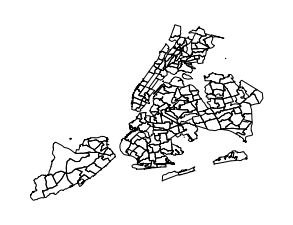

In [21]:
#Plot the geodataframe and save it into a shape file
geoplot.polyplot(geo_df_res,figsize=(5,5))
geo_df_res.to_file('zonas.shp')

## Merge demographic information into 'zonas' shape

In [22]:
demografics = pd.read_csv('demographics.csv')
demografics.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [23]:
merged = pd.merge(geo_df_res, demografics, on='nta_code', how='inner')
merged.crs = {'init' :'epsg:4326'}
merged.head()
len(merged)

188

In [24]:
merged.to_file('geo_demographic.shp')

## Identify the closest weather probe to each nta zone

In [119]:
weather = pd.read_csv('weather.csv')
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


In [120]:
weather_stations = gpd.GeoDataFrame(weather.groupby('location').mean()[['longitude','latitude']])
weather_stations

,longitude,latitude
location,,
Central Park,-73.974187,40.771133
JFK,-73.779982,40.647490
LGA,-73.873966,40.776927


In [122]:
weather_stations['geometry'] = weather_stations.apply(lambda row: 
                                        shp.geometry.Point(row['longitude'],row['latitude']),axis=1)
weather_stations.crs = {'init' :'epsg:4326'}
weather_stations.drop(['longitude','latitude'],axis=1,inplace=True)
weather_stations

,geometry
location,
Central Park,POINT (-73.97419 40.77113)
JFK,POINT (-73.77998 40.64749)
LGA,POINT (-73.87397 40.77693)


In [123]:
#Measure the distance
for i in range (0,3):
    merged['distance'+weather_stations.index[i]] = merged['geometry'].distance(weather_stations.iloc[i,0])

In [124]:
dicStation = {
    0: 'CP',
    1: 'JFK',
    2: 'LGA'
}
merged['WeatherStation'] = merged.apply(lambda row: dicStation[list(row[-3:]).index(min(list(row[-3:])))],axis=1)
#del merged['WeatherStation']

In [125]:
merged.drop(['distanceCentral Park','distanceJFK','distanceLGA'],inplace=True,axis=1)

In [126]:
merged.head(3)

,geometry,nta_code,nta_name,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,...,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,WeatherStation
0,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88,Borough Park,Brooklyn,106357,14703,11971,10024,9094,8640,...,3850,3711,4098,2136,2486,1043,783,35754,55689,CP
1,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52,East Flushing,Queens,26982,1350,1318,1281,1602,2048,...,739,1151,1329,1080,1386,425,316,55971,70852,LGA
2,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48,Auburndale,Queens,19996,917,966,1063,1168,1214,...,632,690,1417,1060,1237,589,433,70772,84402,LGA


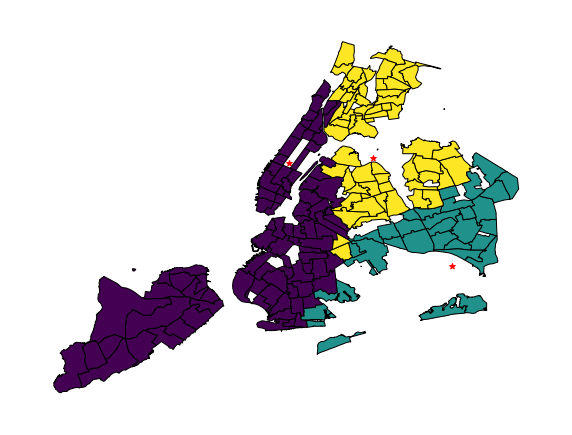

In [127]:
ax = choropleth(merged,'WeatherStation')
weather_stations.plot(color='red', 
                      marker='*',
                      ax=ax)

In [128]:
merged.to_file('weather_geo_demographic.shp')